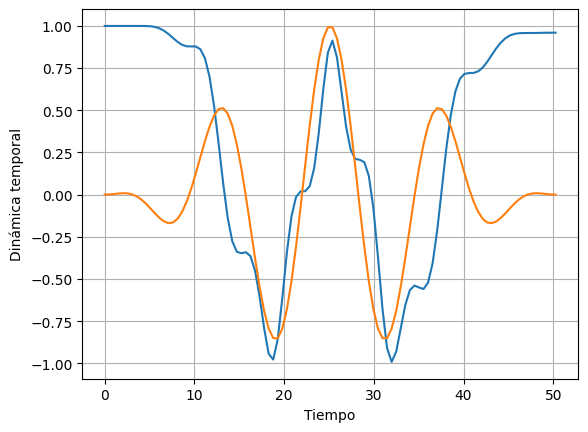

In [3]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
N = 2
omega_l = 0.5
omega_r = 0.5
mu=0.5

T=8*np.pi*2


# Definimos el tiempo discreto
num_steps = 100
t = np.linspace(0, T, num_steps)

# Definimos la funcion que nos da el pulso
def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso2(t):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

# Definimos el Hamiltoniano cero atómico con sigma_z como operador de Pauli
H0 = 0.5* sigmaz()*omega_r


# Definimos el operador ( sigma_+ + sigma_- )
HI = (sigmap() + sigmam())*mu

#Definamos el hamiltoniano total
H = [H0, [HI, pulso]]

# Definimos el estado inicial
psi0 = basis(N, 0)

# Calculamos la evolucion temporal
output = mesolve(H, psi0, t, [], [sigmaz(),sigmam()*sigmap(),sigmap()*sigmam()])



#Gráfica de la evolución temporal
plt.plot(t, output.expect[0])
plt.plot(t,pulso2(t))
plt.xlabel('Tiempo')
plt.ylabel('Dinámica temporal')
plt.grid()
plt.show()






In [10]:
#Veamos la parte de la radiación 
# Definimos el Hamiltoniano cero atómico con sigma_z como operador de Pauli
#Definamos los operadores de anihilación y creación a y a dagger
N1 = 300
a = destroy(N1)
ad = create(N1)

H0 = omega_r*(ad*a + 1/2)




# Definimos el operador ( a + a dagger )
H1 = (ad + a)

#Definamos el hamiltoniano total
H = [H0, [H1, pulso]]

# Definimos el estado inicial
psi0 = basis(N1, 0)
result2 = mesolve(H, psi0, t, [], [ad*a])
# Calculamos la evolucion temporal
#Quiero ver la probabilidad de encontrar desde cero hasta 299 fotones

#Quiero hacer un histograma para cada tiempo
probabilidad = []
for i in range(0,300):
    p_i = basis(N1, i)*basis(N1, i).dag()
    output = mesolve(H, psi0, t, [], [ad*a,p_i])
    probabilidad.append(output.expect[1])

    



    """p_i = basis(N1, i)*basis(N1, i).dag()
    output = mesolve(H, psi0, t, [], [ad*a,p_i])
    plt.plot(t, output.expect[1])
    plt.xlabel('Tiempo')
    plt.ylabel('Número de fotones')
    plt.grid()
    plt.show()"""

#p_000=fock_dm(N1, 0)  # 0 fotones

#t = np.linspace(0, 10, 1000)



In [11]:
#Tengo la probabilidad de encontrar n fotones para cada tiempo, y quiero ver como evoluciona la probabilidad de encontrar n fotones en el tiempo
#Para eso, voy a hacer histogramas de la probabilidad de encontrar n fotones para cada tiempo, y los voy a graficar en función de n

#Importo las librerías que voy a usarVoy a usar la lista de listas que ya tengo, y voy a hacer un histograma para cada tiempo

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#Defino la función que va a hacer el histograma para cada tiempo
def histograma_tiempo(probabilidad, tiempo):
    #Debo tomar el enesimo elemento de cada sublista de la lista de listas
    #Para eso, voy a hacer un ciclo for que recorra cada sublista, y que tome el enesimo elemento de cada sublista


    #Defino la lista donde voy a guardar los enesimos elementos de cada sublista
    lista_enelementos = []

    #Defino el ciclo for que recorre cada sublista
    for i in range(len(probabilidad)):
        #Defino el enesimo elemento de cada sublista
        enelemento = probabilidad[i][tiempo]
        #Agrego el enesimo elemento a la lista de enelementos
        lista_enelementos.append(enelemento)

    #Defino la lista de n
    lista_n = []

    #Defino el ciclo for que va a definir la lista de n
    for i in range(len(probabilidad)):
        #Defino n
        n = i
        #Agrego n a la lista de n
        lista_n.append(n)

    #Defino el histograma
    plt.bar(lista_n, lista_enelementos, color = 'b')
    plt.xlabel('n')
    plt.ylabel('Probabilidad')
    plt.title('Probabilidad de encontrar n fotones en el tiempo t = ' + str(tiempo))
    #guardar la imagen en una carpeta 
    plt.savefig('histograma_tiempo_' + str(tiempo) + '.png')
    plt.show()
    
    
    





In [7]:
import cv2
import os

# Ruta donde se encuentran las imágenes
images_folder = "/home/luis/Documents/2023-2/Trabajo_de_Grado/QUTIP/histogramas/"

# Nombre del video de salida
output_video = "video_salida.mp4"

# Obtener la lista de nombres de archivos en orden

image_names = sorted(
    [img for img in os.listdir(images_folder) if img.endswith(".png")],
    key=lambda x: int(x.split("_")[2].split(".")[0])
)


# Leer la primera imagen para obtener sus dimensiones
first_image = cv2.imread(os.path.join(images_folder, image_names[0]))
height, width, layers = first_image.shape

# Configurar el codec y crear un objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Puedes cambiar el codec según tus necesidades
video = cv2.VideoWriter(output_video, fourcc, 10, (width, height))

# Agregar cada imagen al video
for image_name in image_names:
    img_path = os.path.join(images_folder, image_name)
    img = cv2.imread(img_path)
    video.write(img)
plt.plot(t, result2.expect[1], label="Inversion de poblacion",color='black',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)

# Liberar recursos
video.release()
cv2.destroyAllWindows()

print("Video creado exitosamente:", output_video)







    

Video creado exitosamente: video_salida.mp4


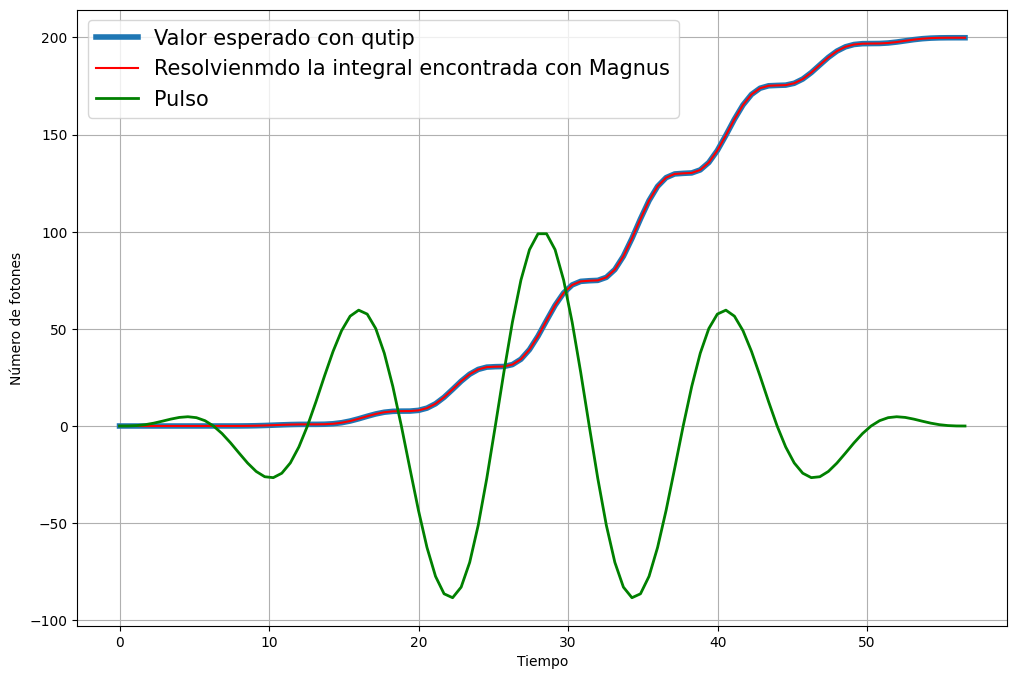

In [22]:
from scipy.integrate import quad
plt.plot(t, result2.expect[1], label="Inversion de poblacion",color='black',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
#Ahora calculemos el valor de la integral para cada valor d)
def alpha(t,T,omega_l,omega_0):
    return -(np.sin(np.pi*t/T)**2)*np.cos(omega_l*(t-T/2))*np.exp(-1j*omega_0*t)
integral_values=[]
integral_values_imag=[]
integral_values_real=[]
integral_values_abs=[]
for i in range(len(t)):
    integral_values.append(quad(alpha,0,t[i],args=(T,omega_l,omega_r),complex_func=True)[0])
    integral_values_abs.append(abs(integral_values[i])**2)

#Ahora separamos la parte real de la parte imaginaria
for i in range(len(integral_values)):psi0

#Graficamos la parte real e imaginaria de la integral
"""plt.figure(figsize=(10,5))
plt.plot(t,integral_values_imag,label='Imaginaria')
plt.plot(t,integral_values_real,label='Real')
plt.plot(t,integral_values_abs,label='Absoluto')
plt.xlabel('t',fontsize=15)
plt.ylabel('Valor de la integral',fontsize=15)
plt.legend(fontsize=15)psi0



#Gráfica de la evolución temporal
plt.figure(figsize=(12,8))
plt.plot(t, output.expect[0],lw=4,label='Valor esperado con qutip')
plt.plot(t,integral_values_abs,lw=1.5,label="Resolvienmdo la integral encontrada con Magnus",color='red')
plt.xlabel('Tiempo')
plt.ylabel('Número de fotones')
plt.grid()
#Pintemos el pulso
plt.plot(t, pulso2(t)*100,label='Pulso',color='green',lw=2)psi0
plt.legend(fontsize=15)
plt.show()


